In [1]:
%cd ../..

f:\DR\Stock-Market-Prediction\src


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

from models.lstm_v3.lstm_model import build_model, train_model, save_lstm_model, load_lstm_model
from models.lstm_v3.lstm_normalize import get_lstm_data, TREND_CLASSES, SEQUENCE_COLUMNS
from utils.chart import config_chart, plot_model_performance, plot_scatter_data, plot_distribution_data, plot_direction_comparison
from constants import SP500_TICKER
from tensorflow import keras
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.calibration import calibration_curve


# import tensorflow as tf


---

## For **build_model** function

In [3]:
model = build_model()
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 128)           67584     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 119651 (467.39 KB)
Trainable params: 119651 (467.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---

## For **train_model** function

In [4]:
train, test, predict= get_lstm_data(SP500_TICKER)

x_train = train["x"] 
y_train = train["y"].astype('uint8')
y_train = keras.utils.to_categorical(y_train, num_classes=3)

x_test = test["x"]
y_test = test["y"].astype('uint8')
y_test = keras.utils.to_categorical(y_test, num_classes=3)

x_predict = predict["x"]
y_predict = predict["y"].astype('uint8')
y_predict = keras.utils.to_categorical(y_predict, num_classes=3)


print("Train data:")
print(x_train[0])
print(x_train.shape)
print(y_train)
print(y_train.shape)

print("Test data:")
print(y_test[0])
print(x_test.shape)
print(x_test[0])
print(x_test.shape)

print("Predict data:")
print(x_predict[0])
print(x_predict.shape)
print(y_predict)
print(y_predict.shape)


Train data:
[[1399.05  1421.276 1426.066]
 [1381.52  1418.647 1421.896]
 [1378.02  1414.353 1418.175]
 [1422.45  1411.362 1415.885]
 [1420.6   1406.818 1414.601]
 [1448.81  1406.919 1416.286]
 [1477.26  1410.924 1419.671]
 [1467.63  1416.992 1421.421]
 [1457.84  1422.704 1423.104]
 [1471.36  1432.454 1426.065]]
(4759, 10, 3)
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]
(4759, 3)
Test data:
[0. 1. 0.]
(595, 10, 3)
[[2939.88  2916.048 2896.267]
 [2943.03  2919.61  2901.698]
 [2945.83  2923.635 2905.63 ]
 [2923.73  2925.302 2908.455]
 [2917.52  2927.009 2910.661]
 [2945.64  2931.07  2913.973]
 [2932.47  2933.52  2915.96 ]
 [2884.05  2928.557 2915.374]
 [2879.42  2923.774 2915.435]
 [2870.72  2918.229 2914.56 ]]
(595, 10, 3)
Predict data:
[[4535.43  4508.926 4475.257]
 [4520.03  4512.976 4479.641]
 [4514.07  4515.76  4483.506]
 [4493.28  4515.469 4486.05 ]
 [4458.58  4514.327 4485.937]
 [4468.73  4510.263 4485.974]
 [4443.05  4501.689 4484.141]
 [4480.7   4

In [5]:
# plt = config_chart('Model Data')
# plt.plot(y_dates_train[:, 0], y_train[:, 0])
# plt.plot(y_dates_test[:, 0], y_test[:, 0])
# plt.plot(y_dates_predict[:, 0], y_predict[:, 0])
# plt.legend(['Train', 'Test','Predict'])

Epoch 1/100


149/149 [==============================] - 4s 7ms/step - loss: 1.0238 - accuracy: 0.4932 - precision_1: 0.5771 - recall_1: 0.3066
Epoch 2/100
149/149 [==============================] - 1s 7ms/step - loss: 0.8701 - accuracy: 0.5959 - precision_1: 0.7330 - recall_1: 0.4165
Epoch 3/100
149/149 [==============================] - 1s 7ms/step - loss: 0.6249 - accuracy: 0.7363 - precision_1: 0.8036 - recall_1: 0.6541
Epoch 4/100
149/149 [==============================] - 1s 7ms/step - loss: 0.6164 - accuracy: 0.7312 - precision_1: 0.8097 - recall_1: 0.6417
Epoch 5/100
149/149 [==============================] - 1s 7ms/step - loss: 0.5467 - accuracy: 0.7657 - precision_1: 0.8181 - recall_1: 0.6985
Epoch 6/100
149/149 [==============================] - 1s 7ms/step - loss: 0.5404 - accuracy: 0.7686 - precision_1: 0.8296 - recall_1: 0.7058
Epoch 7/100
149/149 [==============================] - 1s 7ms/step - loss: 0.4174 - accuracy: 0.8285 - precision_1: 0.8490 - recall_1: 0.7842
Epoc

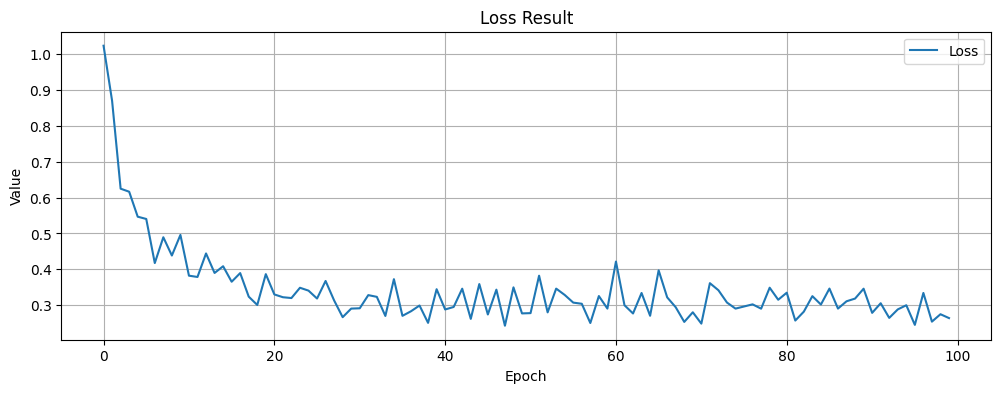

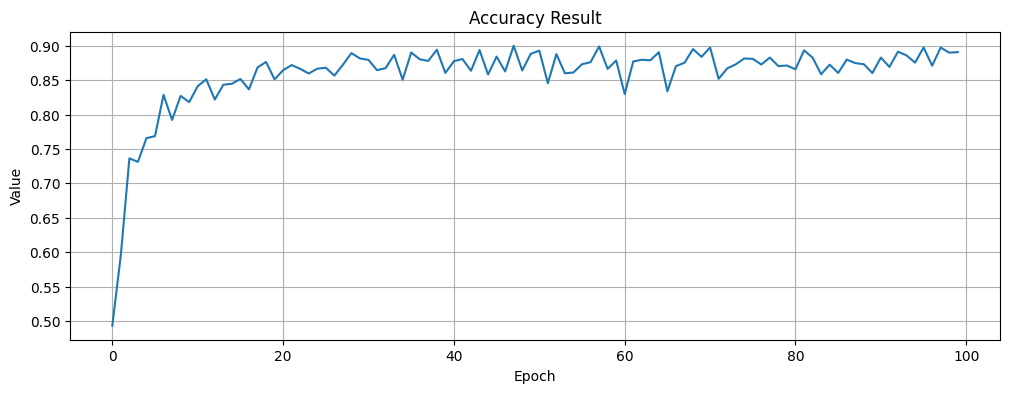

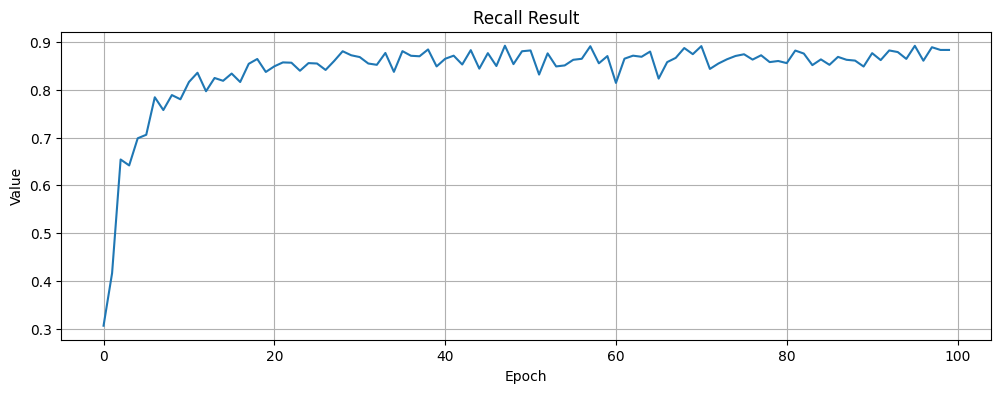

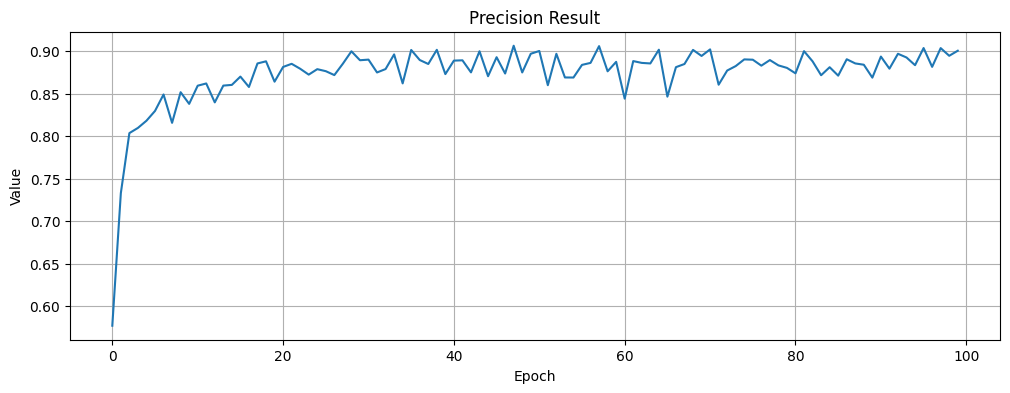

Train result:
Test result:
[0.34069231152534485, 0.853781521320343, 0.8573853969573975, 0.848739504814148]


In [6]:
model, fit_result, evaluate_result = train_model(x_train, x_test, y_train, y_test) 

plot_model_performance(fit_result)
# plot_model_performance(evaluate_result)

print("Train result:")
print(fit_result)

print("Test result:")
print(evaluate_result)

save_lstm_model(model)

In [7]:
latest_train_metrics = [value[-1] for key, value in fit_result.history.items()]

print("Train result:")
print("accuracy, loss, precision, recall")
print(latest_train_metrics)

print("Test result:")
print("loss, accuracy, precision, recall")
print(evaluate_result)

Train result:
accuracy, loss, precision, recall
[0.26380616426467896, 0.8907333612442017, 0.9003856182098389, 0.8831687569618225]
Test result:
loss, accuracy, precision, recall
[0.34069231152534485, 0.853781521320343, 0.8573853969573975, 0.848739504814148]


In [8]:
model = load_lstm_model()

In [9]:
def plotConfusionMatrix(predicted_labels_single, true_labels_single):
    # Convert one-hot encoded labels to single labels
    # true_labels_single = np.argmax(target, axis=1)
    # predicted_labels_single = np.argmax(predictions, axis=1)

    # plt = config_chart("Confusion Matrix")
    # Compute confusion matrix
    cm = confusion_matrix(true_labels_single, predicted_labels_single)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    # Plot confusion matrix
    disp.plot(cmap='Blues', ax=plt.gca())
    plt.title("Confusion Matrix")
    plt.show()
    

def plotCalibration(predictions, target):
    plt = config_chart("Calibration Plot")
    for i in range(3):
        prob_true, prob_pred = calibration_curve(target[:, i], predictions[:, i], n_bins=10)
        plt.plot(prob_pred, prob_true, marker='o', label=f'Class {i}')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("Mean Predicted Probability")
    plt.ylabel("Fraction of Positives")
    plt.legend()
    plt.show()


149/149 [==============================] - 1s 3ms/step
Accuracy: 0.8350493801218744
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1355
           1       0.66      0.64      0.65      1027
           2       1.00      0.82      0.90      2377

    accuracy                           0.84      4759
   macro avg       0.80      0.82      0.80      4759
weighted avg       0.86      0.84      0.84      4759



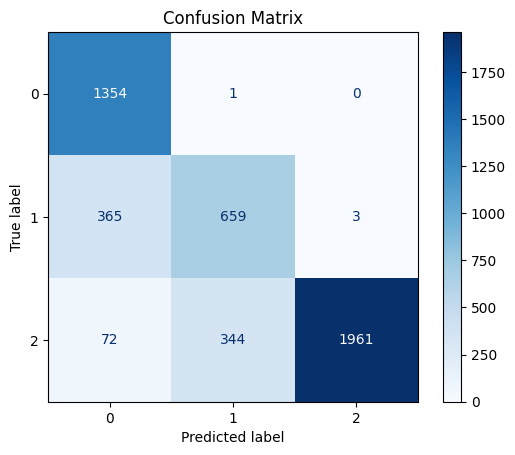

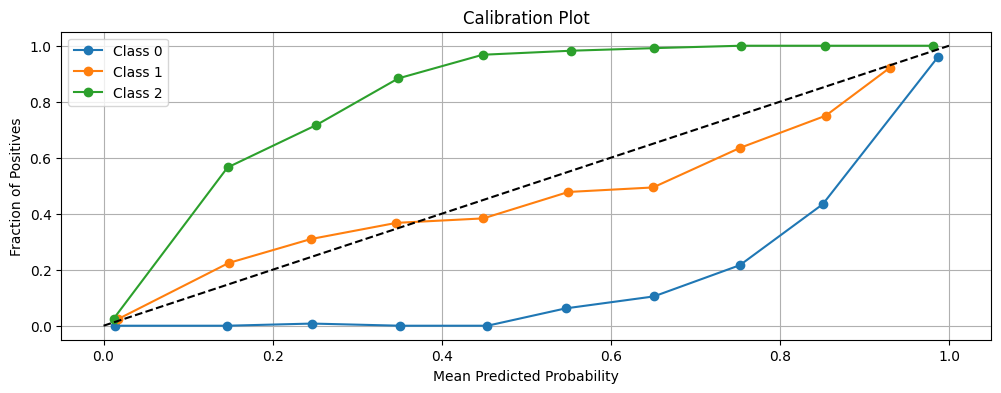

In [10]:
predictions_train = model.predict(x_train)

y_train_classes = np.argmax(y_train, axis=1)
predictions_train_classes = np.argmax(predictions_train, axis=1)


accuracy = accuracy_score(y_train_classes, predictions_train_classes)
print("Accuracy:", accuracy)
report = classification_report(y_train_classes, predictions_train_classes)
print(report)

plotConfusionMatrix(predictions_train_classes, y_train_classes)
plotCalibration(predictions_train, y_train)
# plot_scatter_data(y_train_classes, predictions_train_classes)

19/19 [==============================] - 0s 3ms/step
Accuracy: 0.853781512605042
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       103
           1       0.51      0.78      0.62        87
           2       1.00      0.84      0.91       405

    accuracy                           0.85       595
   macro avg       0.78      0.86      0.81       595
weighted avg       0.90      0.85      0.87       595



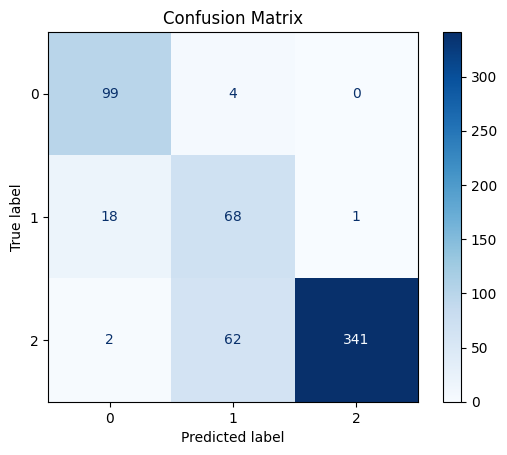

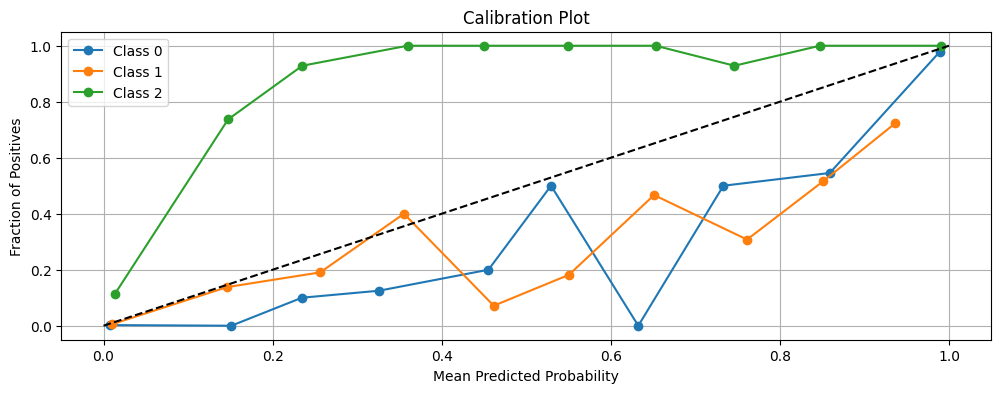

In [17]:
predictions_test = model.predict(x_test)

y_test_classes = np.argmax(y_test, axis=1)
predictions_test_classes = np.argmax(predictions_test, axis=1)


accuracy = accuracy_score(y_test_classes, predictions_test_classes)
print("Accuracy:", accuracy)
report = classification_report(y_test_classes, predictions_test_classes)
print(report)

plotConfusionMatrix(predictions_test_classes, y_test_classes)
plotCalibration(predictions_test, y_test)


# plot_scatter_data(y_test_classes, predictions_test_classes)
# plot_direction_comparison(y_test_classes, predictions_test_classes)


19/19 [==============================] - 0s 3ms/step
Accuracy: 0.8487394957983193
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       209
           1       0.60      0.74      0.66       103
           2       0.99      0.78      0.88       283

    accuracy                           0.85       595
   macro avg       0.81      0.84      0.82       595
weighted avg       0.87      0.85      0.85       595



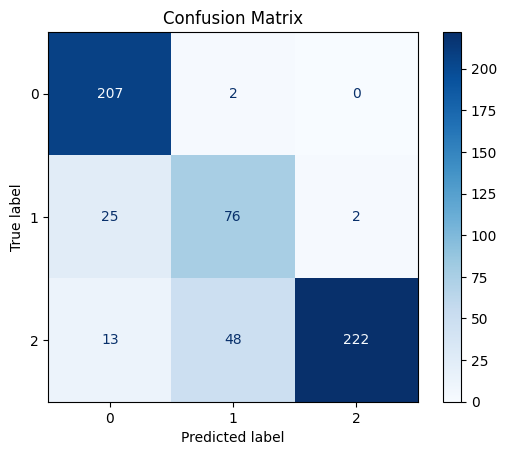

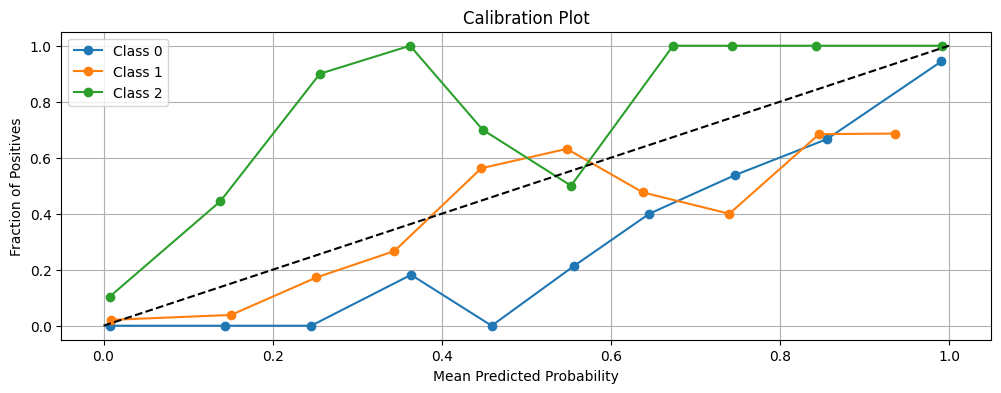

In [12]:
predictions = model.predict(x_predict)


y_predictions_classes = np.argmax(y_predict, axis=1)
predictions_classes = np.argmax(predictions, axis=1)


accuracy = accuracy_score(y_predictions_classes, predictions_classes)
print("Accuracy:", accuracy)
report = classification_report(y_predictions_classes, predictions_classes)
print(report)

plotConfusionMatrix(predictions_classes, y_predictions_classes)
plotCalibration(predictions, y_predict)

# plot_scatter_data(predictions_classes, y_predictions_classes)
# plot_direction_comparison(predictions_classes, y_predictions_classes)

In [13]:

def plot_info(index):
    print(y_predict[index])
    print(predictions[index])

    print("Actual Result:", TREND_CLASSES[y_predictions_classes[index]])
    print("Predicted Result:", TREND_CLASSES[predictions_classes[index]])


    plt = config_chart('Model Data')
    plt.plot(predict["dates"][index], x_predict[index, :, 0])
    plt.plot(predict["dates"][index], x_predict[index, :, 1])
    plt.plot(predict["dates"][index], x_predict[index, :, 2])
    plt.legend(SEQUENCE_COLUMNS)


[0. 0. 1.]
[1.8417104e-05 3.2434671e-04 9.9965715e-01]
Actual Result: Bullish
Predicted Result: Bullish


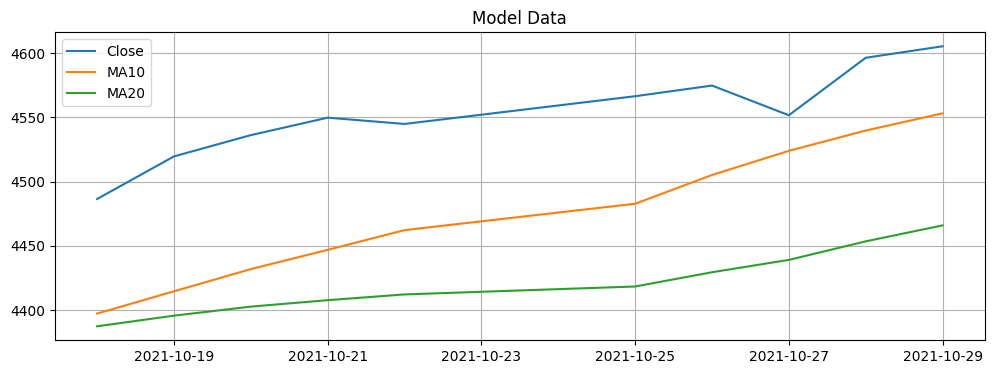

In [14]:
plot_info(30)

[0. 1. 0.]
[0.0916115  0.8950892  0.01329921]
Actual Result: Neutral
Predicted Result: Neutral


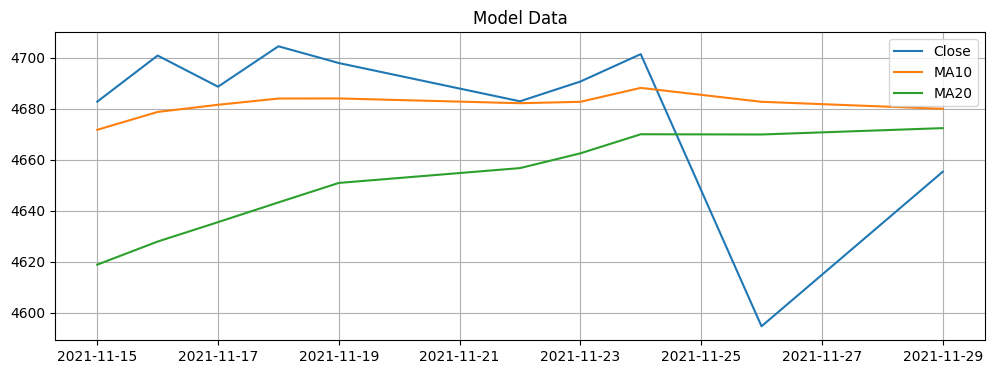

In [15]:
plot_info(50)

[1. 0. 0.]
[9.9989450e-01 9.5033181e-05 1.0540277e-05]
Actual Result: Bearish
Predicted Result: Bearish


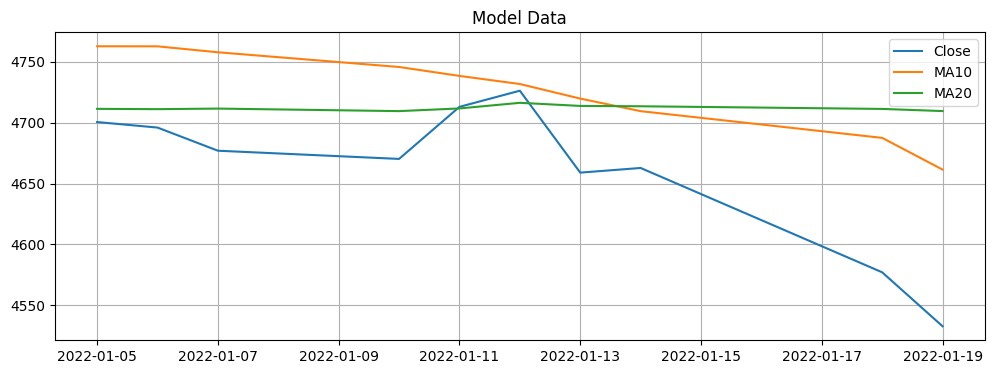

In [16]:
plot_info(85)